## Import Data


In [2]:
"""
Code for the correlation and regression assignment. Most code is copied 
and adapted from class.
"""

# import useful packages
import pandas
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels
import seaborn as sns
import scipy.stats as stats

# style settings
sns.set(color_codes=True, font_scale=1.2)
sns.set_style("whitegrid")

# import and print data
df = pandas.read_csv(
    "https://course-resources.minerva.edu/uploaded_files/mu/00294337-9526/cornerstone-metrics-data-by-class-2021-2022--sample.csv"
)
df.head(9)


,semester,course,course_id,section,section_id,class,class_id,num_students,num_classes,num_class_users,...,num_reactions,num_hand_raises,num_chat_messages,total_minutes_class,total_minutes_breakout,avg_student_reactions,avg_student_hand_raises,avg_student_chat_messages,total_attendance_percent,total_percent_breakout
0,Fall 2021,Formal Analyses,1947,MW@09:00AM San Francisco,7754,CS50 Session 7 - (4.1) Fallacy Detection,57536,19,1,19,...,212,222,19,90.002095,7,11.157895,11.684211,1.000000,100.000000,0.077776
1,Fall 2021,Formal Analyses,1947,TTh@05:00PM San Francisco,7857,CS50 Session 15 - (8.2) Distributions of Discr...,58234,20,1,19,...,164,139,38,89.993982,19,8.200000,6.950000,1.900000,89.473684,0.211125
2,Fall 2021,Formal Analyses,1947,TTh@11:00AM San Francisco,7755,CS50 Session 24 - (13.2) Difference of Means T...,59700,18,1,18,...,52,103,2,90.001793,15,2.888889,5.722222,0.111111,94.444444,0.166663
3,Fall 2021,Formal Analyses,1947,MW@07:00AM San Francisco,7792,CS50 Session 1 - (1.1) Critical Thinking,56195,18,1,18,...,105,55,6,90.002059,15,5.833333,3.055556,0.333333,100.000000,0.166663
4,Fall 2021,Formal Analyses,1947,MW@07:00AM San Francisco,7792,CS50 Session 8 - (4.2) Logic Synthesis,57227,18,1,18,...,126,92,22,89.997007,8,7.000000,5.111111,1.222222,94.444444,0.088892
5,Fall 2021,Formal Analyses,1947,MW@07:00AM San Francisco,7792,CS50 Session 21 - (11.2) Confidence Intervals ...,59387,18,1,18,...,72,95,2,89.995877,18,4.000000,5.277778,0.111111,83.333333,0.200009
6,Fall 2021,Formal Analyses,1947,TTh@11:00AM San Francisco,7817,CS50 Session 18 - (10.1) Sampling Distribution...,59046,16,1,16,...,105,76,15,89.993349,16,6.562500,4.750000,0.937500,93.750000,0.177791
7,Fall 2021,Formal Analyses,1947,MW@11:00AM San Francisco,7906,CS50 Session 20 - (11.1) Confidence Intervals ...,59299,20,1,20,...,90,146,55,89.998430,22,4.500000,7.300000,2.750000,90.000000,0.244449
8,Fall 2021,Formal Analyses,1947,MW@11:00AM San Francisco,7906,CS50 Session 12 - (7.1) Correlation,58056,20,1,20,...,171,194,85,90.006820,18,8.550000,9.700000,4.250000,100.000000,0.199985


## Defining the Variables


In [3]:
# adapted from CS50 Assignment 2: Describing Data and CS50: Assignment 3: Statistical Inference

# isolate the columns with variables of interest
input1 = df["total_minutes_breakout"]  # independent variable, x
input2 = df["student_talk_time_average"]  # dependent variable, y


## Defining Range-Function (not built in)


## Relevant Descriptive Stats and Histogram for Total Minutes Breakout


count: 240
mean: 14.241666666666667
median: 14.5
mode: 0    10
Name: total_minutes_breakout, dtype: int64
range: 34
std: 5.9263200366776445


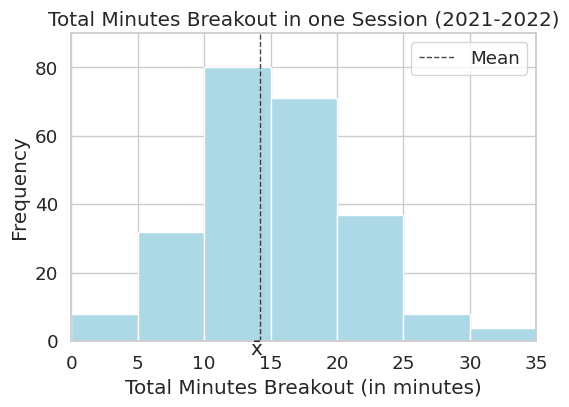

In [4]:
# CALCULATE DESCRIPTIVE STATS using built in functions and own range function
print(
    "count:", input1.count()
)  # .count() returns the number of datapoints in input (dataframe)
print("mean:", input1.mean())  # .mean() returns mean of the input (dataframe)
print("median:", input1.median())  # .median() returns median of the input (dataframe)
print("mode:", input1.mode())  # .mode() returns mode of the input (dataframe)
print(
    "range:", input1.max() - input1.min()
)  # compute the range (subtracting min from max)
print(
    "std:", input1.std()
)  # .std() returns standard deviation of the input (dataframe)


# HISTOGRAM
# structure copied from CS50 Assignment 2: Describing Data and CS50 Assignment 3: Statistical Inference

fig, ax = plt.subplots(figsize=(6, 4))

range_r = (0, 35)  # define the range the histogram is supposed to show
bins = 7  # define the bins
# (groups the data in blocks of 7, makes data easy to comprehend as bin size equals the labels, visually appealing)

plt.hist(input1, bins, range_r, color="lightblue")  # visualize data
plt.xlim(0, 35)
plt.ylim(0, 90)

plt.title("Total Minutes Breakout in one Session (2021-2022)")  # add title to histogram
plt.xlabel("Total Minutes Breakout (in minutes)")  # add label to x axis
plt.ylabel("Frequency")  # add label to y axis

plt.axvline(14.24166666, color="k", linestyle="dashed", linewidth=1, alpha=0.8)
ax.text(13.5, -4, "x̄")
plt.legend(["Mean"])

plt.show()  # show the histogram


## Relevant Descriptive Stats and Histogram for Average Student Talk Time


count: 240
mean: 112.59583333333333
median: 111.25
mode: 0    101.0
1    105.0
2    111.0
3    112.0
4    114.0
5    123.0
Name: student_talk_time_average, dtype: float64
range: 261.0
std: 29.866354744865745


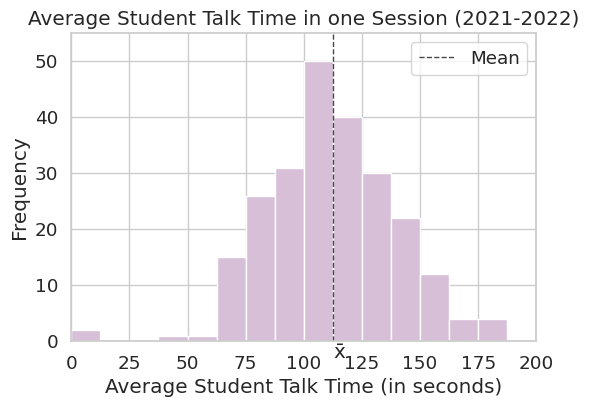

In [5]:
# CALCULATE DESCRIPTIVE STATS using built in functions and own range function

print(
    "count:", input2.count()
)  # .count() returns the number of datapoints in input (dataframe)
print("mean:", input2.mean())  # .mean() returns mean of the input (dataframe)
print("median:", input2.median())  # .median() returns median of the input (dataframe)
print("mode:", input2.mode())  # .mode() returns mode of the input (dataframe)
print(
    "range:", input2.max() - input2.min()
)  # computing the range (subtracting min from max)
print(
    "std:", input2.std()
)  # .std() returns standard deviation of the input (dataframe)


# HISTOGRAM
# structure copied from CS50 Assignment 2: Describing Data and CS50 Assignment 3: Statistical Inference

fig, ax = plt.subplots(figsize=(6, 4))

range_r = (0, 200)  # define the range the histogram is supposed to show
bins = 16  # define the bins
# (groups the data in blocks of 16, makes data easy to comprehend as bin size equals the labels, visually appealing)

plt.hist(input2, bins, range_r, color="thistle")  # visualize data
plt.xlim(0, 200)
plt.ylim(0, 55)

plt.title(
    "Average Student Talk Time in one Session (2021-2022)"
)  # add title to histogram
plt.xlabel("Average Student Talk Time (in seconds)")  # add label to x axis
plt.ylabel("Frequency")  # add label to y axis

plt.axvline(
    112.5958333, color="k", linestyle="dashed", linewidth=1, alpha=0.8, label="mean "
)
ax.text(112.5958333, -3, "x̄")
plt.legend(["Mean"])

plt.show()  # show the histogram


## Pearson's R and R squared (Correlation)


In [6]:
# CORRELATION
# calculate Pearson's r (version 1, using numpy)
r_1, p = np.corrcoef(list(input1), list(input2))
# 'corrcoef' calculates correlation coefficient between two input lists 'input1' and 'input2'
# results are assigned to variables 'r_1' and 'p' for further use
print("Pearson's r [1] =", r_1)


# calculate Person's r (version 2, using panda)
r = round(df["total_minutes_breakout"].corr(df["student_talk_time_average"]), 5)
# Calculating Pearson's r value between column_x and column_y in the dataframe
# rounding the result to 3 decimal points, and displaying pearson's r value

print("Pearson's r [2] =", r)


Pearson's r [1] = [1.         0.23576527]
Pearson's r [2] = 0.23577


In [7]:
# calculate r squared (version 1, using Pearson'S r calculated above)
print("r squared =", r**2)


r squared = 0.0555874929


## Regression (R squared, Regression equation, Plot and Distribution of Residuals)


/tmp/ipykernel_25203/2387340679.py:49: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid, kde=False, axlabel="Residuals", color="red")


R-squared =  0.056
Regression equation: student_talk_time_average =  1.188 * total_minutes_breakout +  95.674


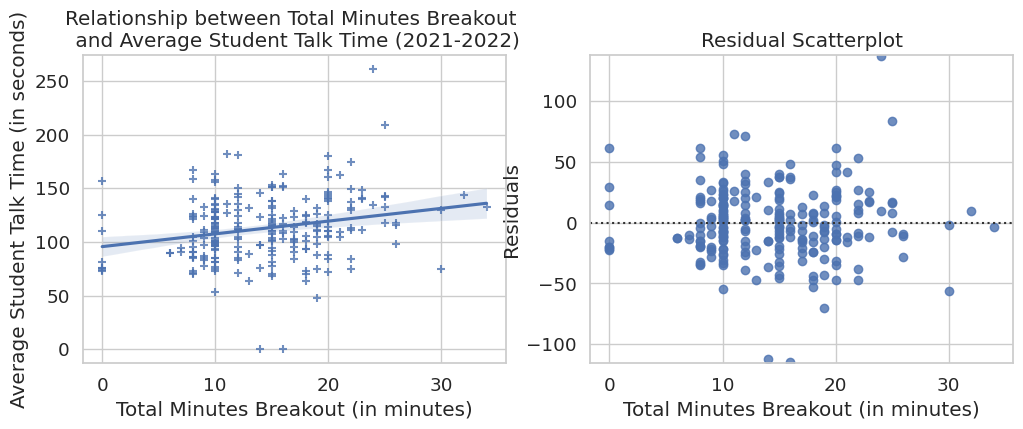

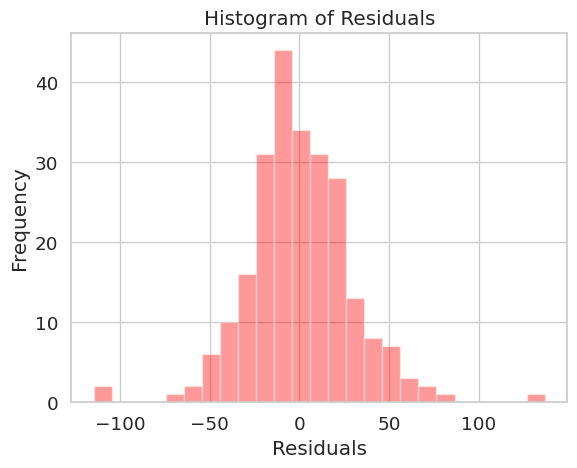

In [8]:
# calculate r squared (version 2) and regression parameters (using statsmodels)

column_x = "total_minutes_breakout"
column_y = "student_talk_time_average"

# assign predictor and dependent variables to Y and X
Y = df[column_y]
X = df[column_x]

# add a constant to X using statsmodels library
# without the constant, the model would assume that the y-intercept is 0
# adding a constant allows the model to fit appropriate y-intercept
X = statsmodels.add_constant(X)

# fit the model using Ordinary Least Squares (finding the best-fitting line through a set of data points
# by minimizing the sum of the squared differences between observed responses and predicted responses)
# and the defined predictor and independent variables
model = statsmodels.OLS(Y, X).fit()

# display summary of model's results
model.summary()

# extract regression parameters from model, rounded to 3 decimal places:
Rsquared = round(model.rsquared, 3)
slope = round(model.params[1], 3)
intercept = round(model.params[0], 3)

# make plots:
# scatter plot
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12, 4))
sns.regplot(x=column_x, y=column_y, data=df, marker="+", ax=ax1)
ax1.set_title(
    "Relationship between Total Minutes Breakout \n and Average Student Talk Time (2021-2022)"
)  # add title
ax1.set(
    xlabel="Total Minutes Breakout (in minutes)",
    ylabel="Average Student Talk Time (in seconds)",
)
# add label for x-axis and y-axis

# residual plot
sns.residplot(x=column_x, y=column_y, data=df, ax=ax2)
ax2.set_title("Residual Scatterplot")
ax2.set(xlabel="Total Minutes Breakout (in minutes)", ylabel="Residuals")
ax2.set_ylim(min(model.resid) - 1, max(model.resid) + 1)

# histogram
plt.figure()
sns.distplot(model.resid, kde=False, axlabel="Residuals", color="red")
plt.ylabel("Frequency")  # add label for y-axis
plt.title("Histogram of Residuals")  # add title

# print the results:
print("R-squared = ", Rsquared)
print(
    "Regression equation: " + column_y + " = ",
    slope,
    "* " + column_x + " + ",
    intercept,
)


## Confidence Interval (Slope)


In [9]:
# given summary statistics:
r  # earlier calculated Pearson's r
x_bar = input1.mean()  # mean of variable 1 (Total Minutes Breakout)
y_bar = input2.mean()  # mean of variable 2 (Average Student Talk Time)
sx = input1.std()  # standard deviation of variable 1 (Total Minutes Breakout)
sy = input2.std()  # standard deviation of variable 2 (Average Student Talk Time)
n = input1.count()  # amount of datapoints

# b1: represents the slope of a simple linear regression line, is calculated as the sample standard deviation
# of the dependent variable (sy) multiplied by the sample correl. coeff. between the independent and dependent variables (r)
# divided by the sample standard deviation of the independent variable (sx)
# tells us the average change in the dependent variable for a one-unit change in the independent variable
b1 = sy * r / sx
print("b1 =", b1)

# SE: standard error, measure of the precision of the estimate of the slope, is calculated by taking the ratio
# of the sample std of the dependent variable (sy) and the sample std of the independent variable (sx)
# multiplied by the square root of the ratio of 1 minus the square of the sample correlation coefficient (r)
# to the sample size minus 2 (degrees of freedom)
SE = (sy / sx) * (((1 - r**2) / (n - 2)) ** 0.5)
print("SE =", SE)

# t: t-value/score, measure of the distance between a sample mean and the population mean in units of standard error
# .ppf uses inverse cumulative distribution function of the t-distribution employing significance level and degrees of freedom
t = stats.t.ppf(0.975, n - 2)
print("t =", t)

# confidence interval: calculating limits (bounds) of confidence interval by adding or subtracting the standard error
# multiplied by the t-value to/from the sample estimate of the slope
lower_bound = b1 - t * SE
upper_bound = b1 + t * SE
print("interval =", [lower_bound, upper_bound])


b1 = 1.1881893678736568
SE = 0.31746036032717373
t = 1.9699815295289813
interval = [0.5627983216715096, 1.813580414075804]
